In [4]:
pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.5 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.5 MB 6.9 MB/s eta 0:00:02
   -------------- ------------------------- 4.2/11.5 MB 6.8 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 6.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 6.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.6 MB 6.9 MB/s eta 0:00:02
   --------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
pip install openpyxl


In [10]:
import pandas as pd

# Step 1: Loading the data
file_path = r"C:\Users\TundeJolaosho\Downloads\E.on sales data.xlsx"
df = pd.read_excel(file_path)

# Reviewing the first few rows of the dataset
print(df.head())

# Checking for missing values
print(df.isnull().sum())

# Filling missing values with appropriate strategies (mean for numerical, mode for categorical)
df['SALES'] = df['SALES'].fillna(df['SALES'].mean())
df['PRODUCTLINE'] = df['PRODUCTLINE'].fillna(df['PRODUCTLINE'].mode()[0])

# Droping any remaining rows with missing critical information
df = df.dropna()

# Remove duplicates if any
df = df.drop_duplicates()

# Converting 'ORDERDATE' to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Verifying data cleaning
print(df.info())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

             ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0       2/24/2003 0:00  Shipped       1         2     2003  ...   
1  2003-07-05 00:00:00  Shipped       2         5     2003  ...   
2  2003-01-07 00:00:00  Shipped       3         7     2003  ...   
3       8/25/2003 0:00  Shipped       3         8     2003  ...   
4  2003-10-10 00:00:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue d

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Loading the data
file_path = r"C:\Users\TundeJolaosho\Downloads\E.on sales data.xlsx"
df = pd.read_excel(file_path)

# Converting the 'ORDERDATE' column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Selecting relevant features 
# Let's assume 'SALES' is the target, and 'CUSTOMERNAME', 'PRODUCTLINE', etc., are features.
X = df[['CUSTOMERNAME', 'PRODUCTLINE', 'ORDERDATE']]  # Features
y = df['SALES']  # Target variable

# Labelling encode categorical variables
label_encoder = LabelEncoder()

# Applying Label Encoding to categorical columns
X['CUSTOMERNAME'] = label_encoder.fit_transform(X['CUSTOMERNAME'])
X['PRODUCTLINE'] = label_encoder.fit_transform(X['PRODUCTLINE'])

# Also, we can extract month/year from 'ORDERDATE' if needed for the model
X['ORDER_MONTH'] = X['ORDERDATE'].dt.month
X['ORDER_YEAR'] = X['ORDERDATE'].dt.year
X = X.drop('ORDERDATE', axis=1)  # Drop 'ORDERDATE' if not needed

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model (using Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3859674.261258031


C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\4285667045.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CUSTOMERNAME'] = label_encoder.fit_transform(X['CUSTOMERNAME'])
C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\4285667045.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PRODUCTLINE'] = label_encoder.fit_transform(X['PRODUCTLINE'])
C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\4285667045.py:26: SettingWithCopyWarning: 
A value is trying to be set on a co

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 5: Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1481.8904418544387
Mean Squared Error: 3859674.261258031
R-squared: 0.016481980641326888


In [12]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 6.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 6.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 6.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 6.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 6.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 6.7 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/44.5 MB 6.7 MB/s eta 0:00:07
   -- ------------------------------------- 2.6/44.5 MB 6.6 MB/s eta 0:00:07
   --- ----

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Change the model
from sklearn.preprocessing import LabelEncoder

# Loading the data
file_path = r"C:\Users\TundeJolaosho\Downloads\E.on sales data.xlsx"
df = pd.read_excel(file_path)

# Converting the 'ORDERDATE' column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Selecting relevant features
X = df[['CUSTOMERNAME', 'PRODUCTLINE', 'ORDERDATE']]  # Features
y = df['SALES']  # Target variable

# Labelling encode categorical variables
label_encoder = LabelEncoder()

# Applying Label Encoding to categorical columns
X['CUSTOMERNAME'] = label_encoder.fit_transform(X['CUSTOMERNAME'])
X['PRODUCTLINE'] = label_encoder.fit_transform(X['PRODUCTLINE'])

# Optionally, we can extract month/year from 'ORDERDATE'
X['ORDER_MONTH'] = X['ORDERDATE'].dt.month
X['ORDER_YEAR'] = X['ORDERDATE'].dt.year
X = X.drop('ORDERDATE', axis=1)  # Drop 'ORDERDATE' if not needed

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the model (Using Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
        

C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\1435545426.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CUSTOMERNAME'] = label_encoder.fit_transform(X['CUSTOMERNAME'])
C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\1435545426.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PRODUCTLINE'] = label_encoder.fit_transform(X['PRODUCTLINE'])
C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_23120\1435545426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a co

Mean Squared Error: 4322376.364387754


In [1]:
pip install matplotlib seaborn



   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 6.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 6.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 6.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


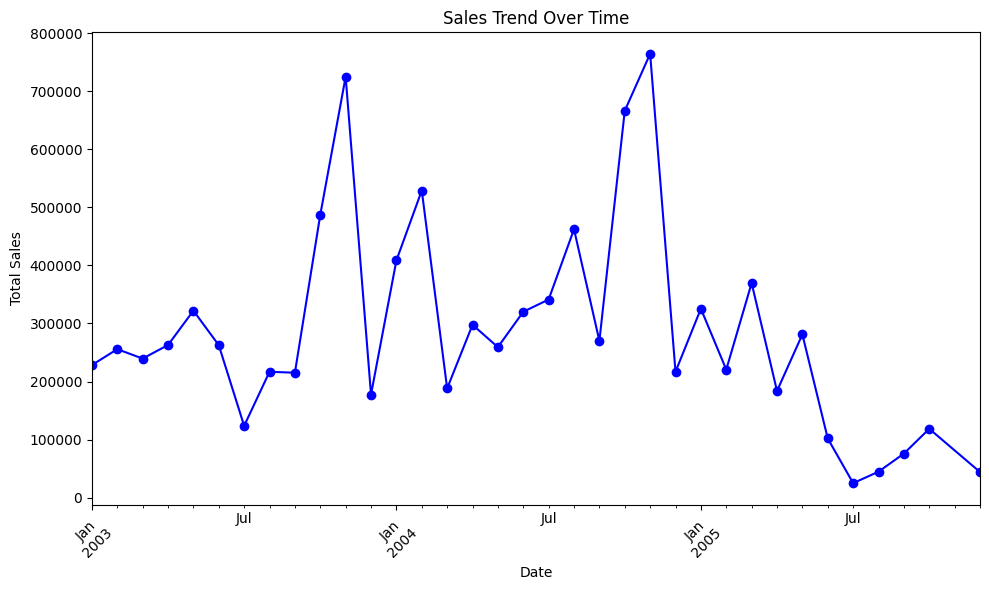

C:\Users\TundeJolaosho\AppData\Local\Temp\ipykernel_56496\1732963731.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_lines.index, y=top_product_lines.values, palette='viridis')


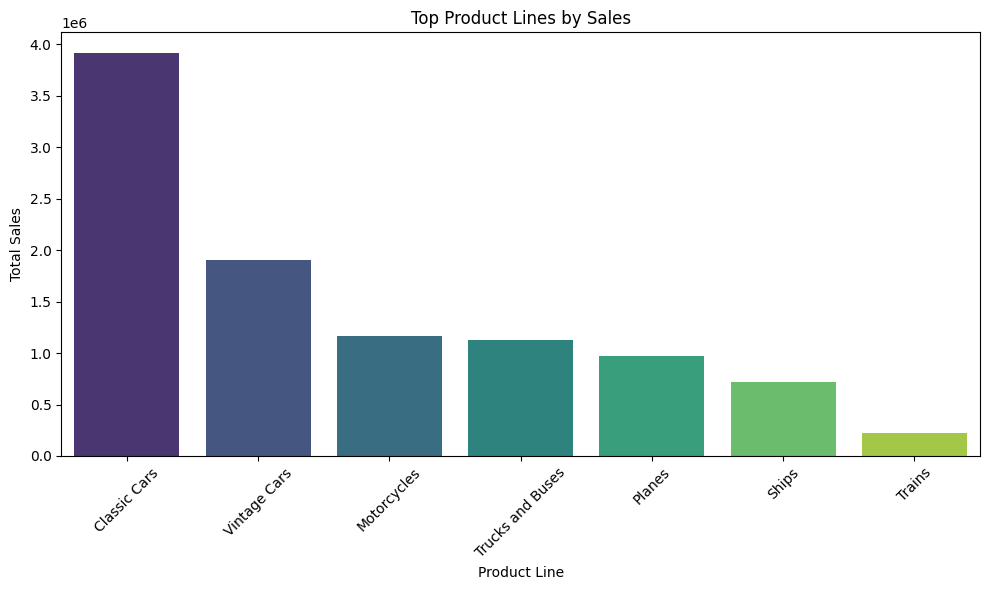

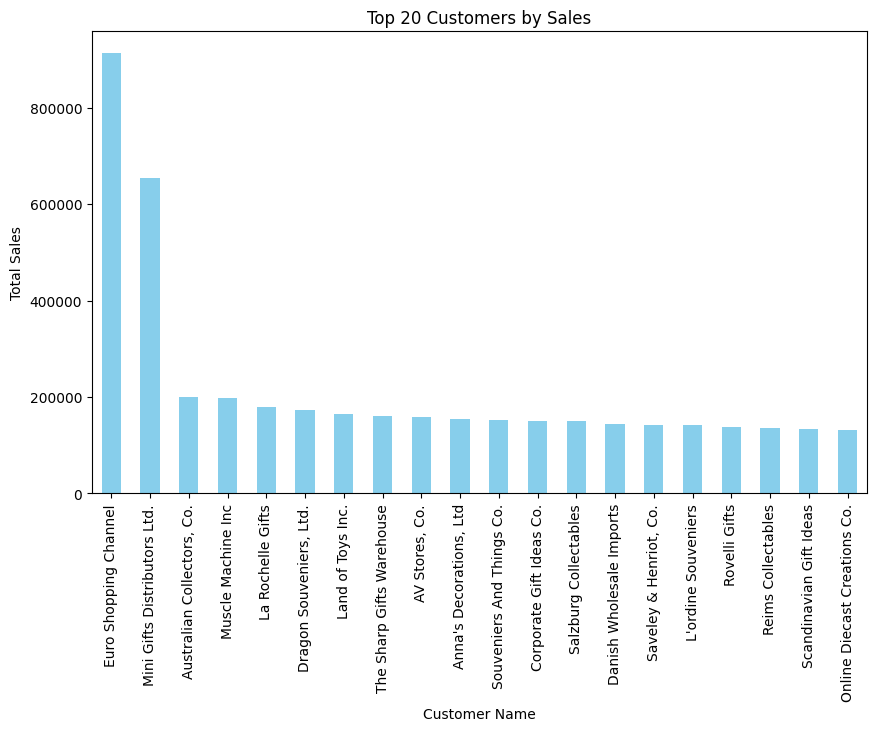

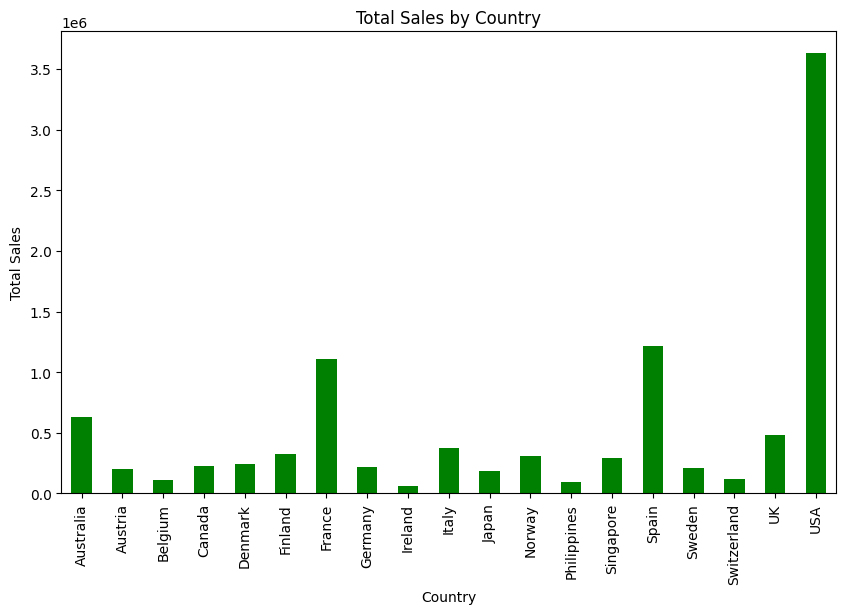

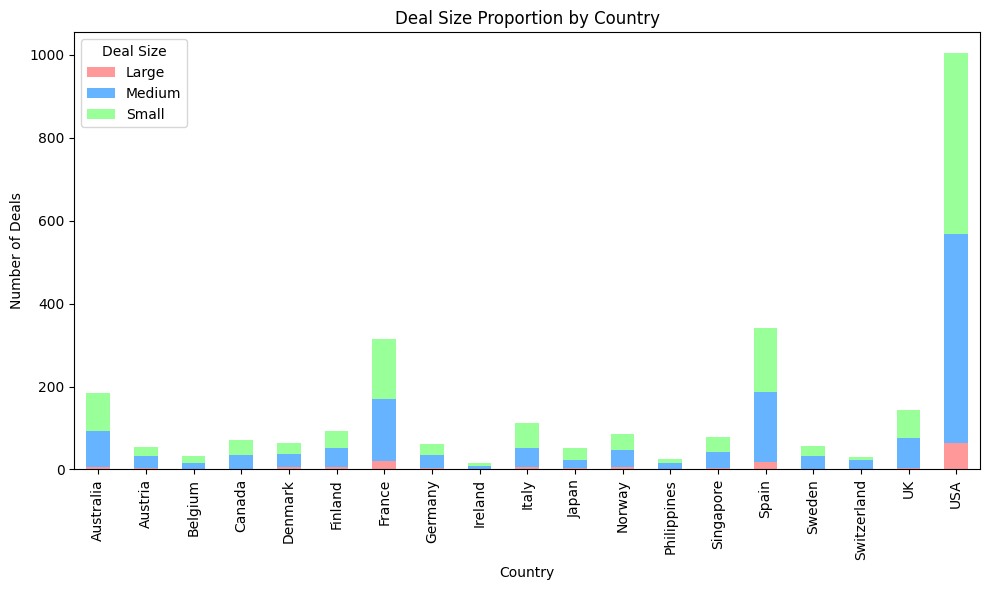

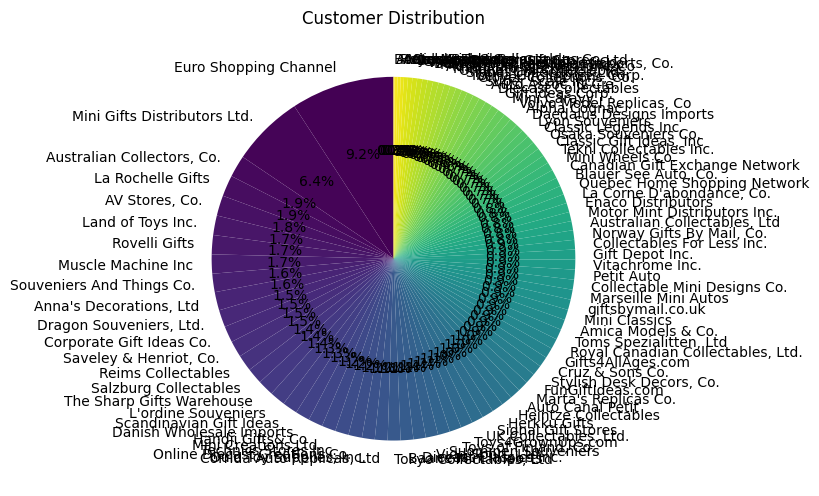

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\TundeJolaosho\Downloads\E.on sales data.xlsx"
df = pd.read_excel(file_path)

# Convert the 'ORDERDATE' column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Clean the 'SALES' column: convert to numeric, coerce errors to NaN
df['SALES'] = pd.to_numeric(df['SALES'], errors='coerce')

# Drop rows with NaN values in 'SALES' or 'ORDERDATE'
df = df.dropna(subset=['SALES', 'ORDERDATE'])

# Line Graph: Sales Trend Over Time
plt.figure(figsize=(10, 6))
# Group by 'ORDERDATE' and sum the 'SALES' values
sales_trend = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
sales_trend.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart: Top Product Lines by Sales
plt.figure(figsize=(10, 6))
top_product_lines = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sns.barplot(x=top_product_lines.index, y=top_product_lines.values, palette='viridis')
plt.title('Top Product Lines by Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the top 20 customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 20 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#Sales by Country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Plotting sales by country
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='green')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Plot the stacked bar chart
deal_size_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Deal Size Proportion by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deals')
plt.xticks(rotation=90)
plt.legend(title='Deal Size')
plt.tight_layout()
plt.show()


# Pie Chart: Customer Distribution
plt.figure(figsize=(8, 8))
customer_distribution = df['CUSTOMERNAME'].value_counts()
customer_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', wedgeprops={'linewidth': 1})
plt.title('Customer Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


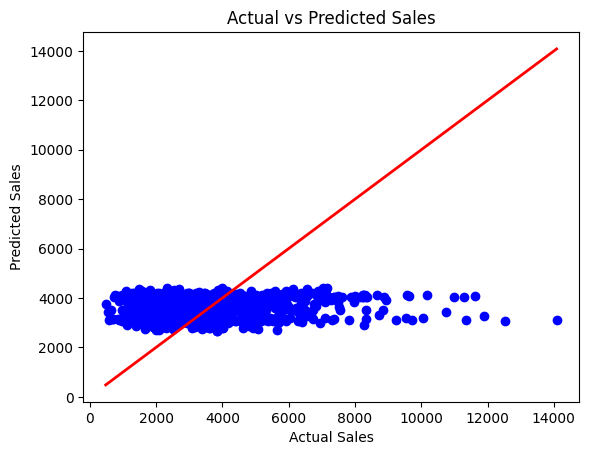

Mean Squared Error: 3822891.7625955087
R-squared: 0.02585485715444369


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the E.On dataset from Excel
file_path = r"C:\Users\TundeJolaosho\Downloads\E.on sales data.xlsx"
data = pd.read_excel(file_path)

# Print column names to inspect
print(data.columns)

# Convert 'Order Date' column to datetime if it's not already
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Convert 'Order Date' to numeric by calculating the number of days since the minimum date
data['ORDERDATE Numeric'] = (data['ORDERDATE'] - data['ORDERDATE'].min()).dt.days

# Update with actual column names from your dataset
# Assuming 'Order Date Numeric', 'Product Line', 'Country' are features and 'Total Sales' is the target
X = data[['ORDERDATE Numeric', 'PRODUCTLINE', 'COUNTRY']]  # Replace with actual feature columns
y = data['SALES']  # Replace with the actual column name for sales

# Convert categorical features to dummy/one-hot encoding
X = pd.get_dummies(X, columns=['PRODUCTLINE', 'COUNTRY'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales using the test set
y_pred = model.predict(X_test)

# Scatter plot comparing predicted vs actual sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
